In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from datetime import datetime

In [3]:

# Chargement des données depuis un fichier CSV 
data = pd.read_csv('C:/Users/utilisateur/Desktop/datasets/car_price_prediction.csv')

# Affichage des premières lignes du DataFrame
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
# Informations sur le DataFrame (types de données, valeurs manquantes, etc.)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [5]:
# Vérifier que 'Prod. year' ne contient pas de valeurs nulles ou les traiter si nécessaire
data00 = data.dropna(subset=['Prod. year'])

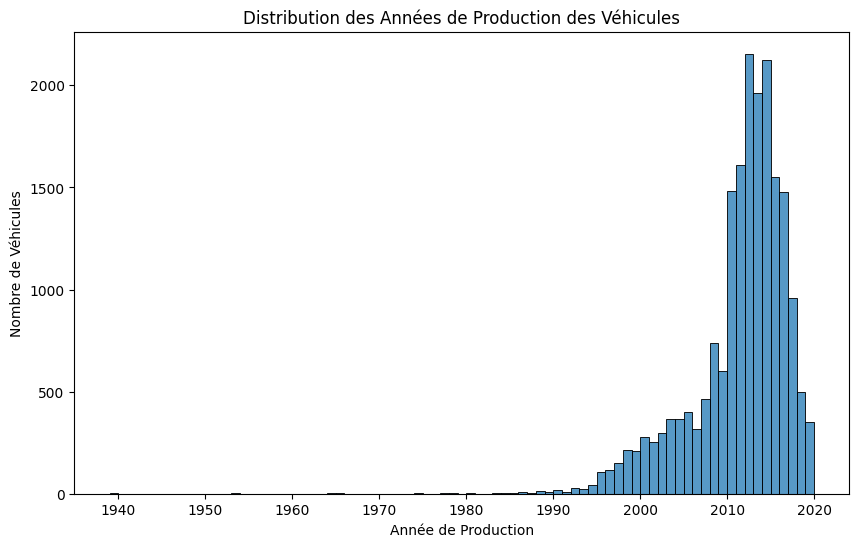

In [6]:
# Créer le diagramme de distribution des années de production
plt.figure(figsize=(10, 6))
sns.histplot(data['Prod. year'], kde=False, bins=int(data['Prod. year'].max() - data['Prod. year'].min()))
plt.title('Distribution des Années de Production des Véhicules')
plt.xlabel('Année de Production')
plt.ylabel('Nombre de Véhicules')
plt.show()

In [7]:
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [8]:
# Nettoyer la colonne 'Engine volume' pour ne conserver que les parties numériques
data['Engine volume'] = data['Engine volume'].str.extract('(\d+\.\d+)').astype(float)
data['Mileage'] = data['Mileage'].str.extract('(\d+)').astype(int)
data = data.rename(columns={'Mileage': 'Mileage(km)'})

In [9]:

data = data.dropna()

In [10]:
data['Leather interior'] = data['Leather interior'].map({'Yes': True, 'No': False})

In [11]:
# Convertissez la colonne "Prod. year" en dates (année)
data.loc[:, 'Prod. year'] = data['Prod. year'].apply(lambda x: datetime(x, 1, 1))

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_27172\257851291.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['2010-01-01 00:00:00', '2006-01-01 00:00:00', '2011-01-01 00:00:00',
 '2014-01-01 00:00:00', '2010-01-01 00:00:00', '2013-01-01 00:00:00',
 '2014-01-01 00:00:00', '2007-01-01 00:00:00', '2014-01-01 00:00:00',
 '1997-01-01 00:00:00',
 ...
 '2014-01-01 00:00:00', '2007-01-01 00:00:00', '2014-01-01 00:00:00',
 '2008-01-01 00:00:00', '2008-01-01 00:00:00', '2011-01-01 00:00:00',
 '2013-01-01 00:00:00', '1999-01-01 00:00:00', '2011-01-01 00:00:00',
 '2012-01-01 00:00:00']
Length: 14189, dtype: datetime64[ns]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, 'Prod. year'] = data['Prod. year'].apply(lambda x: datetime(x, 1, 1))


In [12]:
# Nettoyer la colonne 'Levy' en supprimant les caractères non numériques
data['Levy'] = data['Levy'].replace(['-', ''], '0', regex=True)

# Convertir la colonne 'Levy' en type int
data['Levy'] = data['Levy'].astype(int)

In [13]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 14189 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                14189 non-null  int64         
 1   Price             14189 non-null  int64         
 2   Levy              14189 non-null  int32         
 3   Manufacturer      14189 non-null  object        
 4   Model             14189 non-null  object        
 5   Prod. year        14189 non-null  datetime64[ns]
 6   Category          14189 non-null  object        
 7   Leather interior  14189 non-null  bool          
 8   Fuel type         14189 non-null  object        
 9   Engine volume     14189 non-null  float64       
 10  Mileage(km)       14189 non-null  int32         
 11  Cylinders         14189 non-null  float64       
 12  Gear box type     14189 non-null  object        
 13  Drive wheels      14189 non-null  object        
 14  Doors             14189 non

In [14]:
# Statistiques descriptives pour les colonnes numériques
print(data.describe())

                 ID         Price          Levy  \
count  1.418900e+04  1.418900e+04  14189.000000   
mean   4.554738e+07  1.879636e+04    609.374375   
min    2.074688e+07  1.000000e+00      0.000000   
25%    4.566073e+07  4.704000e+03      0.000000   
50%    4.577094e+07  1.285800e+04    586.000000   
75%    4.579874e+07  2.179600e+04    919.000000   
max    4.581665e+07  2.630750e+07   7536.000000   
std    1.005264e+06  2.215711e+05    576.378354   

                          Prod. year  Engine volume   Mileage(km)  \
count                          14189    14189.00000  1.418900e+04   
mean   2010-08-13 07:55:40.193107456        2.33588  1.645121e+06   
min              1939-01-01 00:00:00        0.10000  0.000000e+00   
25%              2008-01-01 00:00:00        1.60000  7.313600e+04   
50%              2012-01-01 00:00:00        2.20000  1.270610e+05   
75%              2014-01-01 00:00:00        2.50000  1.873120e+05   
max              2020-01-01 00:00:00        7.30000  2.14

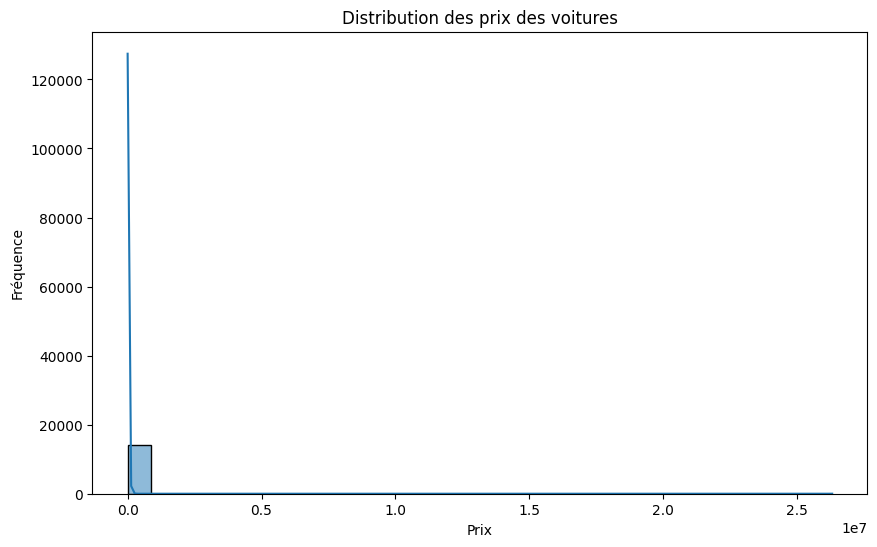

In [15]:
# Distribution des valeurs dans une colonne spécifique
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribution des prix des voitures')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.show()

In [16]:
# Effectuez l'encodage one-hot
data = pd.get_dummies(data, columns=['Fuel type'])

# Liste des colonnes à convertir en int
columns_to_convert = ['Fuel type_Petrol', 'Fuel type_Plug-in Hybrid', 'Fuel type_CNG', 'Fuel type_Diesel', 'Fuel type_Hybrid',
       'Fuel type_Hydrogen', 'Fuel type_LPG']

# Convertissez les valeurs booléennes en entiers (1 et 0)
data[columns_to_convert] = data[columns_to_convert] .astype(int)

# Affichez le DataFrame encodé
data

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Engine volume,Mileage(km),...,Wheel,Color,Airbags,Fuel type_CNG,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid
0,45654403,13328,1399,LEXUS,RX 450,2010-01-01,Jeep,True,3.5,186005,...,Left wheel,Silver,12,0,0,1,0,0,0,0
2,45774419,8467,0,HONDA,FIT,2006-01-01,Hatchback,False,1.3,200000,...,Right-hand drive,Black,2,0,0,0,0,0,1,0
3,45769185,3607,862,FORD,Escape,2011-01-01,Jeep,True,2.5,168966,...,Left wheel,White,0,0,0,1,0,0,0,0
4,45809263,11726,446,HONDA,FIT,2014-01-01,Hatchback,True,1.3,91901,...,Left wheel,Silver,4,0,0,0,0,0,1,0
6,45656768,1803,761,TOYOTA,Prius,2010-01-01,Hatchback,True,1.8,258909,...,Left wheel,White,12,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19230,45760891,470,645,TOYOTA,Prius,2011-01-01,Hatchback,True,1.8,307325,...,Left wheel,Silver,12,0,0,1,0,0,0,0
19231,45772306,5802,1055,MERCEDES-BENZ,E 350,2013-01-01,Sedan,True,3.5,107800,...,Left wheel,Grey,12,0,1,0,0,0,0,0
19232,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999-01-01,Coupe,True,2.0,300000,...,Left wheel,Silver,5,1,0,0,0,0,0,0
19233,45778856,15681,831,HYUNDAI,Sonata,2011-01-01,Sedan,True,2.4,161600,...,Left wheel,Red,8,0,0,0,0,0,1,0


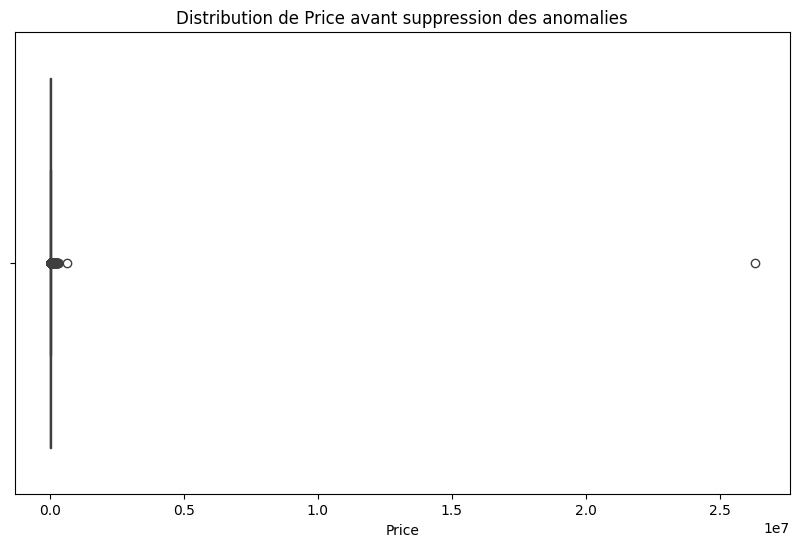

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_27172\1899420602.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('Is_Outlier', axis=1, inplace=True)


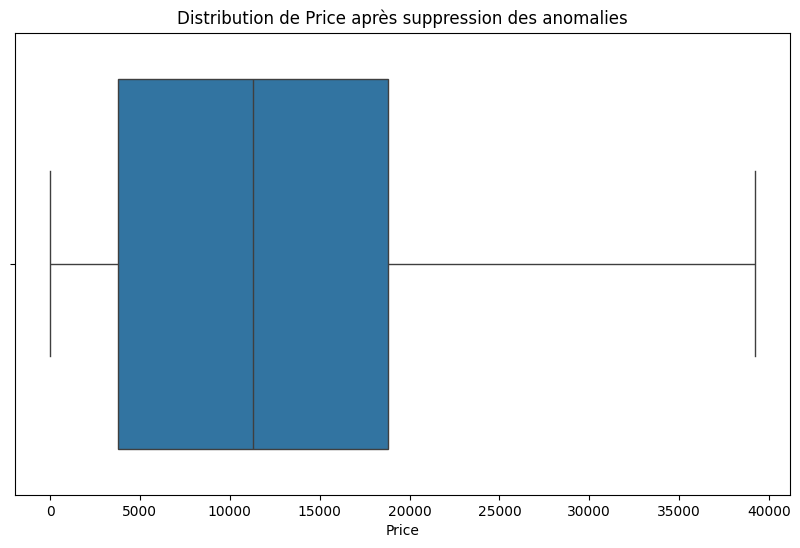

In [17]:
# Visualiser les distributions avec des boxplots - Avant la suppression des anomalies
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Price'])
plt.title('Distribution de Price avant suppression des anomalies')
plt.show()

# Utiliser Isolation Forest pour détecter les anomalies
clf = IsolationForest(contamination=0.1)
data['Is_Outlier'] = clf.fit_predict(data[['Price']])

# Supprimer les anomalies
data = data[data['Is_Outlier'] != -1]

# Supprimer la colonne 'Is_Outlier'
data.drop('Is_Outlier', axis=1, inplace=True)

# Visualiser les distributions avec des boxplots - Après la suppression des anomalies
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Price'])
plt.title('Distribution de Price après suppression des anomalies')
plt.show()

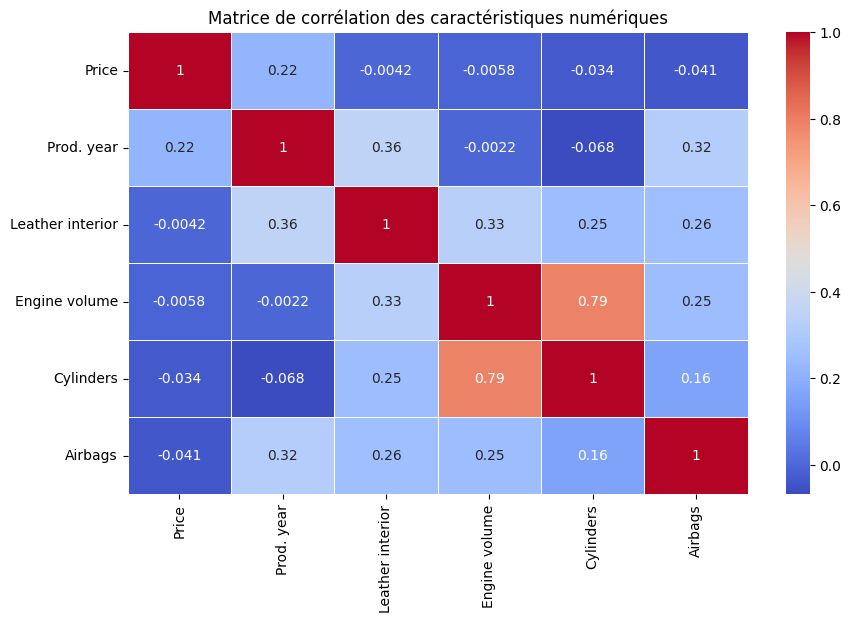

In [24]:
# Sélectionner uniquement les colonnes numériques
numeric_data = data.select_dtypes(include=['float64', 'int64','datetime', 'bool'])

# Éliminer la colonne que vous souhaitez supprimer
numeric_data = numeric_data.drop(columns=["ID"])

# Heatmap pour visualiser les corrélations entre les caractéristiques numériques
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matrice de corrélation des caractéristiques numériques')
plt.show()


In [20]:
data

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Engine volume,Mileage(km),...,Wheel,Color,Airbags,Fuel type_CNG,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid
0,45654403,13328,1399,LEXUS,RX 450,2010-01-01,Jeep,True,3.5,186005,...,Left wheel,Silver,12,0,0,1,0,0,0,0
2,45774419,8467,0,HONDA,FIT,2006-01-01,Hatchback,False,1.3,200000,...,Right-hand drive,Black,2,0,0,0,0,0,1,0
3,45769185,3607,862,FORD,Escape,2011-01-01,Jeep,True,2.5,168966,...,Left wheel,White,0,0,0,1,0,0,0,0
4,45809263,11726,446,HONDA,FIT,2014-01-01,Hatchback,True,1.3,91901,...,Left wheel,Silver,4,0,0,0,0,0,1,0
6,45656768,1803,761,TOYOTA,Prius,2010-01-01,Hatchback,True,1.8,258909,...,Left wheel,White,12,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19230,45760891,470,645,TOYOTA,Prius,2011-01-01,Hatchback,True,1.8,307325,...,Left wheel,Silver,12,0,0,1,0,0,0,0
19231,45772306,5802,1055,MERCEDES-BENZ,E 350,2013-01-01,Sedan,True,3.5,107800,...,Left wheel,Grey,12,0,1,0,0,0,0,0
19232,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999-01-01,Coupe,True,2.0,300000,...,Left wheel,Silver,5,1,0,0,0,0,0,0
19233,45778856,15681,831,HYUNDAI,Sonata,2011-01-01,Sedan,True,2.4,161600,...,Left wheel,Red,8,0,0,0,0,0,1,0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12789 entries, 0 to 19236
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        12789 non-null  int64         
 1   Price                     12789 non-null  int64         
 2   Levy                      12789 non-null  int32         
 3   Manufacturer              12789 non-null  object        
 4   Model                     12789 non-null  object        
 5   Prod. year                12789 non-null  datetime64[ns]
 6   Category                  12789 non-null  object        
 7   Leather interior          12789 non-null  bool          
 8   Engine volume             12789 non-null  float64       
 9   Mileage(km)               12789 non-null  int32         
 10  Cylinders                 12789 non-null  float64       
 11  Gear box type             12789 non-null  object        
 12  Drive wheels           

In [22]:
# Enregistrer le DataFrame dans un fichier CSV
data.to_csv('data.csv', index=False)
